# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Aka

Student name: Aynur Cemre
    
ID: 2071493

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2071493 # place a random seed
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [72 68 54 50 66 67 67 55 48 53]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


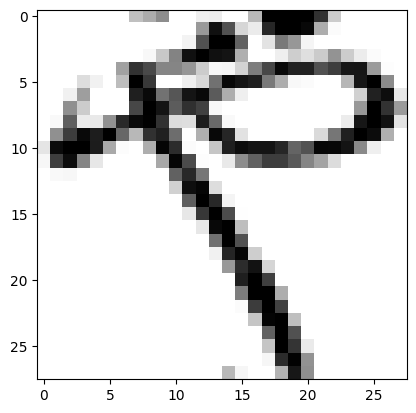

LABEL: 7
INPUT:


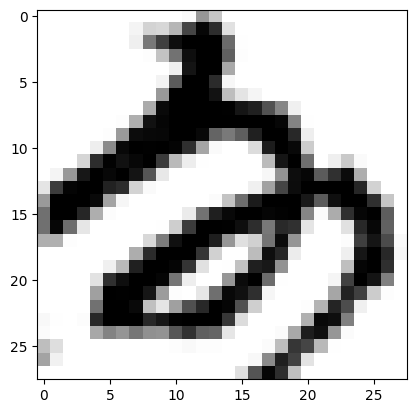

LABEL: 4
INPUT:


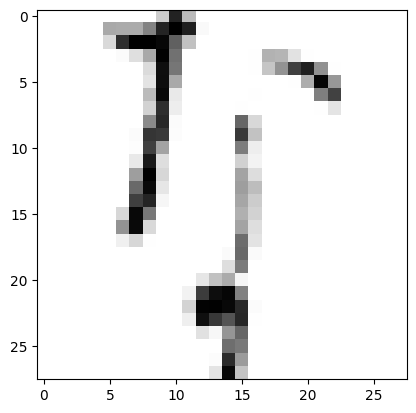

LABEL: 4
INPUT:


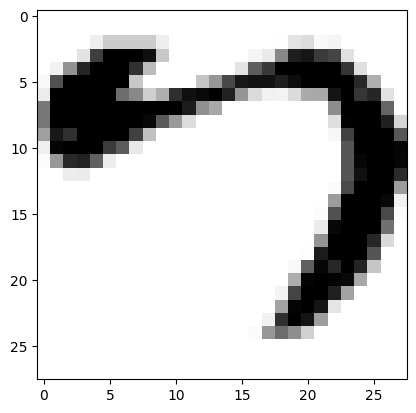

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

# ADD YOUR CODE
svm = SVC(kernel = 'linear')
svm_cv = GridSearchCV(svm, parameters, cv = 4)
svm_cv.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(svm_cv.best_params_)

print("Score with best parameters:")
# ADD YOUR CODE
print(svm_cv.best_score_)

print("All scores on the grid:")
# ADD YOUR CODE
#print(svm_cv.cv_results_)
print("Mean Test Scores: ")
print(svm_cv.cv_results_["mean_test_score"])
print("Std Test Scores: ")
print(svm_cv.cv_results_["std_test_score"])
print("Rank Test Scores: ")
print(svm_cv.cv_results_["rank_test_score"])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01}
Score with best parameters:
0.7533333333333333
All scores on the grid:
Mean Test Scores: 
[0.75333333 0.735      0.735      0.735     ]
Std Test Scores: 
[0.02108185 0.01092906 0.01092906 0.01092906]
Rank Test Scores: 
[1 2 2 2]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

# ADD YOUR CODE
svm_degree_2 = SVC(kernel = 'poly', degree=2)
svm_degree_2_cv = GridSearchCV(svm_degree_2, parameters, cv = 4)
svm_degree_2_cv.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(svm_degree_2_cv.best_params_)

print("Score with best parameters:")
# ADD YOUR CODE
print(svm_degree_2_cv.best_score_)

print("\nAll scores on the grid:")
# ADD YOUR CODE
print("Mean Test Scores: ")
print(svm_degree_2_cv.cv_results_["mean_test_score"])
print("Std Test Scores: ")
print(svm_degree_2_cv.cv_results_["std_test_score"])
print("Rank Test Scores: ")
print(svm_degree_2_cv.cv_results_["rank_test_score"])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.1, 'gamma': 0.1}
Score with best parameters:
0.7549999999999999

All scores on the grid:
Mean Test Scores: 
[0.12       0.74666667 0.75166667 0.45166667 0.755      0.75166667
 0.74666667 0.75166667 0.75166667]
Std Test Scores: 
[0.         0.01632993 0.00986013 0.01658312 0.00552771 0.00986013
 0.01632993 0.00986013 0.00986013]
Rank Test Scores: 
[9 6 2 8 1 2 6 2 2]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

# ADD YOUR CODE
svm_degree_3 = SVC(kernel = 'poly', degree=degree)
svm_degree_3_cv = GridSearchCV(svm_degree_3, parameters, cv = 4)
svm_degree_3_cv.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(svm_degree_3_cv.best_params_)

print("Score with best parameters:")
# ADD YOUR CODE
print(svm_degree_3_cv.best_score_)

print("\nAll scores on the grid:")
# ADD YOUR CODE
print("Mean Test Scores: ")
print(svm_degree_3_cv.cv_results_["mean_test_score"])
print("Std Test Scores: ")
print(svm_degree_3_cv.cv_results_["std_test_score"])
print("Rank Test Scores: ")
print(svm_degree_3_cv.cv_results_["rank_test_score"])

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.72

All scores on the grid:
Mean Test Scores: 
[0.12       0.72       0.70666667 0.33833333 0.70666667 0.70666667
 0.68333333 0.70666667 0.70666667]
Std Test Scores: 
[0.         0.02160247 0.02260777 0.01518406 0.02260777 0.02260777
 0.02768875 0.02260777 0.02260777]
Rank Test Scores: 
[9 1 2 8 2 2 7 2 2]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

# ADD YOUR CODE
svm_rbf = SVC(kernel = 'rbf')
svm_rbf_cv = GridSearchCV(svm_rbf, parameters, cv = 4)
svm_rbf_cv.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(svm_rbf_cv.best_params_)

print("Score with best parameters:")
# ADD YOUR CODE
print(svm_rbf_cv.best_score_)

print("\nAll scores on the grid:")
# ADD YOUR CODE
print("Mean Test Scores: ")
print(svm_rbf_cv.cv_results_["mean_test_score"])
print("Std Test Scores: ")
print(svm_rbf_cv.cv_results_["std_test_score"])
print("Rank Test Scores: ")
print(svm_rbf_cv.cv_results_["rank_test_score"])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8033333333333333

All scores on the grid:
Mean Test Scores: 
[0.12       0.23666667 0.12       0.12       0.60166667 0.795
 0.17833333 0.12       0.76833333 0.80333333 0.2        0.12
 0.74666667 0.80333333 0.2        0.12      ]
Std Test Scores: 
[0.         0.02236068 0.         0.         0.03898005 0.01787301
 0.00986013 0.         0.01280191 0.00745356 0.01699673 0.
 0.02054805 0.00745356 0.01699673 0.        ]
Rank Test Scores: 
[11  7 11 11  6  3 10 11  4  1  8 11  5  1  8 11]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ? <br> <br>
RBF kernel works the best on this dataset compared to other kernels with C = 10 and gamma = 0.01 on this dataset (score = 0.80). <br>
In polynomial degree kernel, after increased the degree to 3, the score started to decrease. Second degree polynomial kernel was the most suitable polynomial kernel. <br>
Linear kernel result is very similar to polynomial kernel with score = 0.753

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
# ADD YOUR CODE
best_SVM = SVC(kernel = 'rbf', C = 10, gamma = 0.01) # taken from svm_rbf (Kernel function = 'rbf')
best_SVM.fit(X_train, y_train)
# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.172250


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


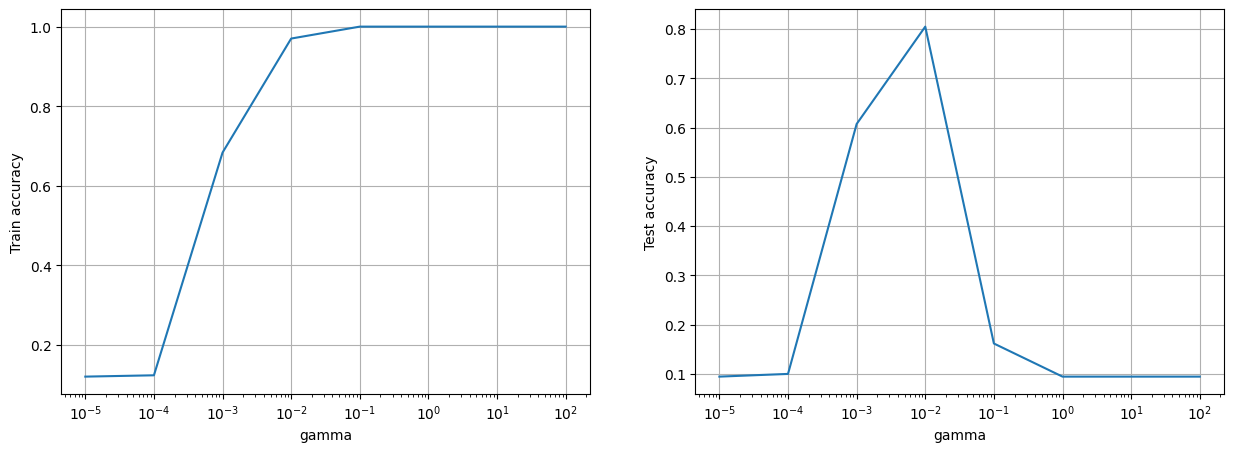

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for i in gamma_values:
    svn_gamma = SVC(kernel = 'rbf', C = 1, gamma=i)
    svn_gamma.fit(X_train, y_train)
    train_acc_list.append(svn_gamma.score(X_train,y_train))
    test_acc_list.append(svn_gamma.score(X_test,y_test))
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue. <br> <br>
The error started to decrease (accuracy increased) as the gamma increased up to 10** (-2). As it was increased after 10**(-2), the model started to overfit and started to memorize the training set instead of learning. So the training accuracy is 1 but the test accuracy is very low. <br>
Best gamma value: 10 ** (-2)

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [203 212 186 196 197 191 195 208 210 202]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE
best_SVM = SVC(kernel = 'rbf', C = 10, gamma = 0.01) 
best_SVM.fit(X_train, y_train)
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.120638


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

# ADD YOUR CODE
logreg = linear_model.LogisticRegression(C=1000) 
logreg.fit(X_train, y_train)

y_training_pred = logreg.predict(X_train)
num_errors = 0
for i in range(m_training):
    if y_train[i] != y_training_pred[i]:
        num_errors += 1
training_error = num_errors / m_training

y_test_pred = logreg.predict(X_test)
num_errors = 0
for i in range(m_training):
    if y_test[i] != y_test_pred[i]:
        num_errors += 1
test_error = num_errors / m_training
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.268000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
# ADD YOUR CODE
logreg2 = linear_model.LogisticRegression(C=1) 
logreg2.fit(X_train, y_train)

y_training_pred = logreg2.predict(X_train)
num_errors = 0
for i in range(m_training):
    if y_train[i] != y_training_pred[i]:
        num_errors += 1
training_error = num_errors / m_training

y_test_pred = logreg2.predict(X_test)
num_errors = 0
for i in range(m_training):
    if y_test[i] != y_test_pred[i]:
        num_errors += 1
test_error = num_errors / m_training

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.000500
Best regularized logistic regression test error: 0.243500


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression
<br><br>
Results from SVM with m=600 and with m=2000: As the value of m increased, the running time of learning increased a lot (and image data is much more complex than numerical or categorical data), but the test error decreased when the size of training is increased. <br>
Results of SVM and of Logistic Regression: SVM worked better than Logistic Regression, because Logistic Regression has no margin option, which the effect of random noise and can not be avoid and overfitting can not be reduced. <br>
Using regularization in Logistic Regression decreased the test error, but not too much. Still, SVM is better than Logistic Regression.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

Result of SVM = 6
Result of LR = 4
INPUT:


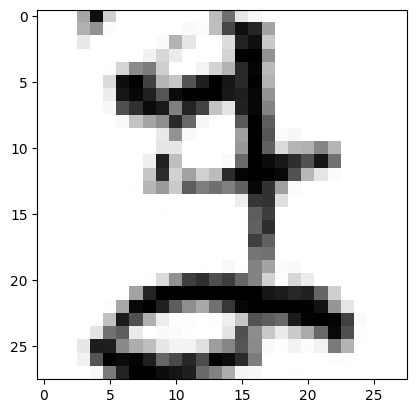

LABEL: 6


In [19]:
LR_prediction = y_test_pred # logistic regression with regularization results
SVM_prediction = best_SVM.predict(X_test)

# ADD CODE
item = None
for i in range(len(LR_prediction)):
    if (LR_prediction[i] !=  y_test[i]) and (SVM_prediction[i] == y_test[i]):
        print("Result of SVM = " + str(SVM_prediction[i]))
        print("Result of LR = " + str(LR_prediction[i]))
        plot_input(X_test, y_test, i)
        break


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
#print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
#print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5797 5788 5814 5804 5803 5809 5805 5792 5790 5798]

 Confusion matrix SVM  
 
 [[5415   12    2   29  107   26   11   95   65   35]
 [  14 4978  162   30  112   19  219    5  100  149]
 [   0  131 4632  119   90   79  317   39  262  145]
 [  16   74  113 5233   70   49   70   39  113   27]
 [ 165  144  108   49 4989   29   83   49   90   97]
 [  83   80   97  224   63 5092   62   20   66   22]
 [  12  103  384   11  171   28 4972   63   38   23]
 [  56   27   45   65  148   14   43 5319   40   35]
 [  55  136   68   46   33   48  166    9 5195   34]
 [  24  148  149   11  170   14   23   33   48 5178]]

 Confusion matrix LR  
 
 [[4962   23   19   52  160  120   11  229   87  134]
 [  20 4146  406  102  170   76  330   38  231  269]
 [   4  328 3537  117  206  203  545  100  506  268]
 [  28  152  128 4439  152  319  107  103  293   83]
 [ 250  268  276  126 4140   87  134  196   88  238]
 [ 144  142  188  314   70 4601   95   93  118   44]
 [  19 

In [21]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
confusion_SVM_normalized = confusion_SVM /counts[:,None]
confusion_LR_normalized = confusion_LR /counts[:,None]
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM_normalized)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR_normalized )


 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.01 0.02 0.   0.   0.02 0.01 0.01]
 [0.   0.86 0.03 0.01 0.02 0.   0.04 0.   0.02 0.03]
 [0.   0.02 0.8  0.02 0.02 0.01 0.05 0.01 0.05 0.02]
 [0.   0.01 0.02 0.9  0.01 0.01 0.01 0.01 0.02 0.  ]
 [0.03 0.02 0.02 0.01 0.86 0.   0.01 0.01 0.02 0.02]
 [0.01 0.01 0.02 0.04 0.01 0.88 0.01 0.   0.01 0.  ]
 [0.   0.02 0.07 0.   0.03 0.   0.86 0.01 0.01 0.  ]
 [0.01 0.   0.01 0.01 0.03 0.   0.01 0.92 0.01 0.01]
 [0.01 0.02 0.01 0.01 0.01 0.01 0.03 0.   0.9  0.01]
 [0.   0.03 0.03 0.   0.03 0.   0.   0.01 0.01 0.89]]

 Confusion matrix LR (normalized)   
 
 [[0.86 0.   0.   0.01 0.03 0.02 0.   0.04 0.02 0.02]
 [0.   0.72 0.07 0.02 0.03 0.01 0.06 0.01 0.04 0.05]
 [0.   0.06 0.61 0.02 0.04 0.03 0.09 0.02 0.09 0.05]
 [0.   0.03 0.02 0.76 0.03 0.05 0.02 0.02 0.05 0.01]
 [0.04 0.05 0.05 0.02 0.71 0.01 0.02 0.03 0.02 0.04]
 [0.02 0.02 0.03 0.05 0.01 0.79 0.02 0.02 0.02 0.01]
 [0.   0.04 0.1  0.01 0.05 0.03 0.7  0.03 0.04 0.01]
 [0.02 0.01 0.0

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes. <br> <br>
Possible causes: 
- Dataset can be unbalanced. <br>
- Dataset can be small for this problem so that the model could not have learned enough. <br>
- The model can not be good enough. <br>
- Some images can be so similar so that these classes need more data to separate from each other